(sec:n_based_px)=

# Neighbourhood based classifiers

&nbsp;&nbsp;&nbsp; Tree based classifiers being not significant, we chose to apply algorithms based in neighbourhood and similarities to see if we can get more information for this pixel dataset.

(sec:KNN)=

## K-Nearest Neighbours

&nbsp;&nbsp;&nbsp; We tried to apply the **K-Nearest Neighboors (KNN)** algorithm which work on distance criterion in the space of the variables. From the train set, we choose an integer $k$ corresponding to the number of neighbours we will consider to classify new data. Looking at the class of the $k$ closer individuals to the new one in the space of variable, the algorithm predicts the class of the individual of the test set. The number of neighbour we choose to consider has an influence to the classification. Indeed, when $k$ increases, range of neighbourhood increases too, leading to a prediction more global than precise. 

&nbsp;&nbsp;&nbsp; After several combinations of parameters, we choose to set $k = 5$, this value being the one giving the best results for this dataset. The [Figure 3.10](fig:KNN_ls) shows the results of the cross validation on the 5 samples and the [Figure 3.11](fig:KNN_CMp) the confusion matrix and the projection of the test on CI06 with learning on the 4 other pictures. We can see that the prediction results are better than XGB without data balancing, but XGB with undersampling remain better. Apply undersampling or oversampling could have been done, but we chose to move on and try stronger tools (see {ref}`sec:SVM`).

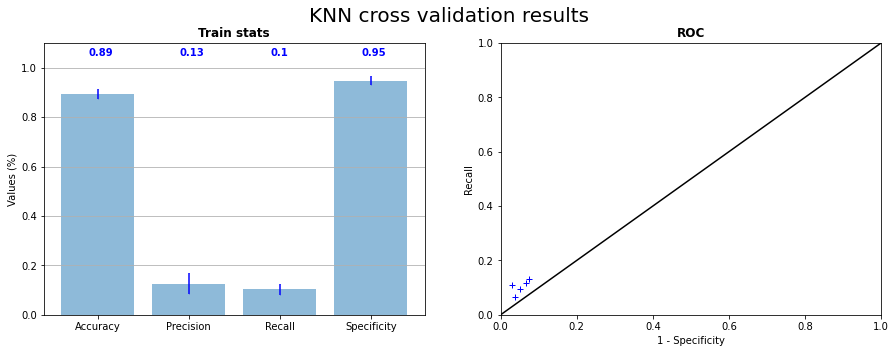

In [1]:
# NO CODE

import numpy as np
import sys
sys.path.append("../../scripts/")
import utils

import matplotlib.pyplot as plt

file_res = "../../../RUN_GRICAD/res/CV_KNN_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_KNN_confmats.txt"

utils.plot_res_CV(file_res, Rcurve=False)

:::{figure-md} fig:KNN_ls
<img src="../../img/vide.png" >

KNN cross validation on the 5 samples statistics and corresponding ROC curve
:::

:::{figure-md} fig:KNN_CMp
<img src="../../img/KNN_CMp.png" >

Confusion matrix of prediction of KNN on CI06 with learning on 4 others samples with projection of the prediction.
:::

(sec:kmeans)=

## K-means

&nbsp;&nbsp;&nbsp; First for a try, but finally with interest, I apply the clustering algorithm **k-means** to the pixel dataset. This method is usable as a binary classifier if we specify only 2 clusters to build. Associating after clustering the class with the best correspondences, we build a classifier which draws the limits of category by finding iteratively the best center of two categories in the variable space. 

&nbsp;&nbsp;&nbsp; The similarity of the 2 classes has also an impact on the prediction of k-means. Indeed, the 2 center being closed, k-means has difficulties to distinguish the 2 categories without overlap the area of prediction. We can see in the [Figure 3.12](fig:Kmeans_CMp) that RX predictions of k-means are shaped as "blobs" around grain boundaries. This kind of prediction gives no more information that a method giving only zeros. On the [Figure 3.13](fig:Kmeans_ls), we can observe on the ROC curve that points of the 5 tests are around the upper right corner, that signify that method have a tendance to predict too much 1. The recall is high but the specificity is low. 

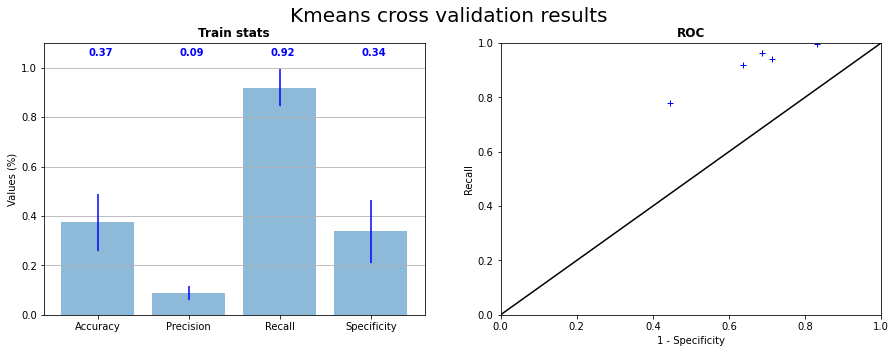

In [5]:
# NO CODE

file_res = "../../../RUN_GRICAD/res/CV_Kmeans_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_Kmeans_confmats.txt"

utils.plot_res_CV(file_res,Rcurve = False)

:::{figure-md} fig:Kmeans_ls
<img src="../../img/vide.png" >

K-means cross validation on the 5 samples statistics and corresponding ROC curve
:::

:::{figure-md} fig:Kmeans_CMp
<img src="../../img/Kmeans_CMp.png" >

Confusion matrix of prediction of k-means on CI06 with learning on 4 others samples with projection of the prediction.
:::

&nbsp;&nbsp;&nbsp; We tried to apply kmeans on the sub-dataset described section {ref}`sec:threshold` to see if moving around the pixels too far from the grain boundaries has a significative effect. We can see in [Figure 3.14](fig:Kmeans-sub_ls) and [Figure 3.15](fig:Kmeans-sub_CMp) the results of the cross validation with learning on the sub-datset. Points of test prediction on ROC curves are better placed with a mean recall at $0.7$ and a mean specificity at $0.66$. The majority of RX pixels are catched but the prediction still remains "blobs" around triple junctions. Looking at the ROC curve, this could be the best model for now, but the prediction gives no more information that RX points append close to triple junction.

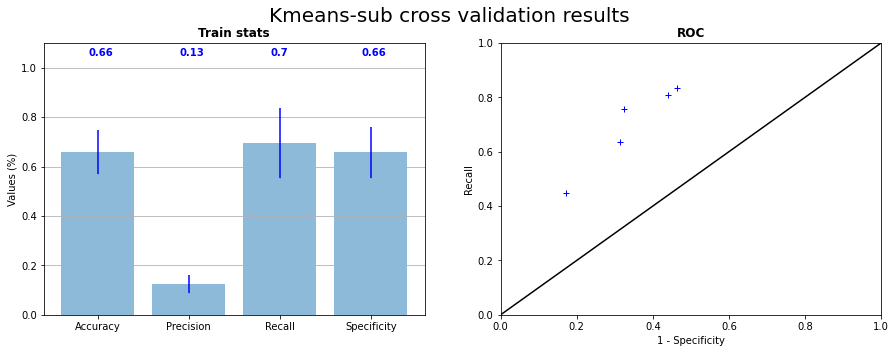

In [13]:
# NO CODE

file_res = "../../../RUN_GRICAD/res/CV_Kmeans-sub_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_Kmeans-sub_confmats.txt"

utils.plot_res_CV(file_res,Rcurve = False)

:::{figure-md} fig:Kmeans-sub_ls
<img src="../../img/vide.png" >

K-means on subdataset cross validation on the 5 samples statistics and corresponding ROC curve
:::

:::{figure-md} fig:Kmeans-sub_CMp
<img src="../../img/Kmeans-sub_CMp.png" >

Confusion matrix of prediction of Kmeans on CI06 with learning on the subdataset of the 4 others samples with projection of the prediction.
:::

(sec:SVM)=

## Support Vector Machine 

&nbsp;&nbsp;&nbsp; The **Support Vector Machine (SVM)** classifier is a popular method of classification that search to calculate the best decision function able to segregate the categories of the dataset. A multitude of parameters can be modified to fit at the best to the data, in particular the *kernel* used to calculate the decision function, characterizing the form of this function (linear, polynomial, non-linear,...). In our case, we chose to use the kernel **Radial Basis Function (RBF)**, allowing to build a function relative to the distance between individuals. 

&nbsp;&nbsp;&nbsp; The computation cost of SVM is high in high dimensions. We choose to apply undersampling on data before learning with SVM to reduce this cost. The [Figure 3.16](fig:SVM_ls) presents the results of the cross validation and the position of test on the ROC curve and the [Figure 3.17](fig:SVM_CMp) the confusion matrix and the projection of the prediction for the test on CI06. We can see that the majority of the RX points are caught by the predictor with a prediction area less linked to grain boundaries. The false positive rate is however high (mean $40 \%$). 

&nbsp;&nbsp;&nbsp; SVM allow also to apply weights on observations to modify the cost of a mistake of classification. We make several cross validation, variating the weight of the mistake on class RX. The mean positions of these cross validations are presented with their standard deviation on [Figure 3.18](fig:SVM_W). We choose to keep the weight of $0.65$ for class RX as the best model to keep a maximum of specificity.

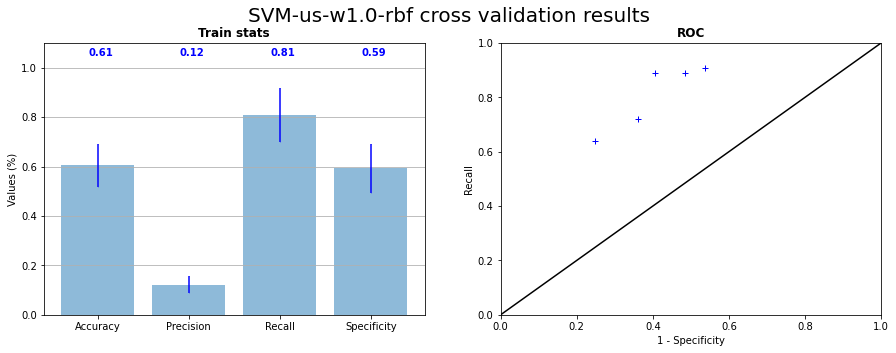

In [2]:
# NO CODE

file_res = "../../../RUN_GRICAD/res/CV_SVM-us-w1.0-rbf_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_SVM-us-w1.0-rbf_confmats.txt"

utils.plot_res_CV(file_res,Rcurve = False)

:::{figure-md} fig:SVM_ls
<img src="../../img/vide.png" >

SVM RBF kernel cross validation with undersampling on the 5 samples statistics and corresponding ROC curve
:::

:::{figure-md} fig:SVM_CMp
<img src="../../img/SVM_CMp.png" >

Confusion matrix of prediction of SVM on CI06 with learning on the 4 others samples with undersampling and projection of the prediction.
:::

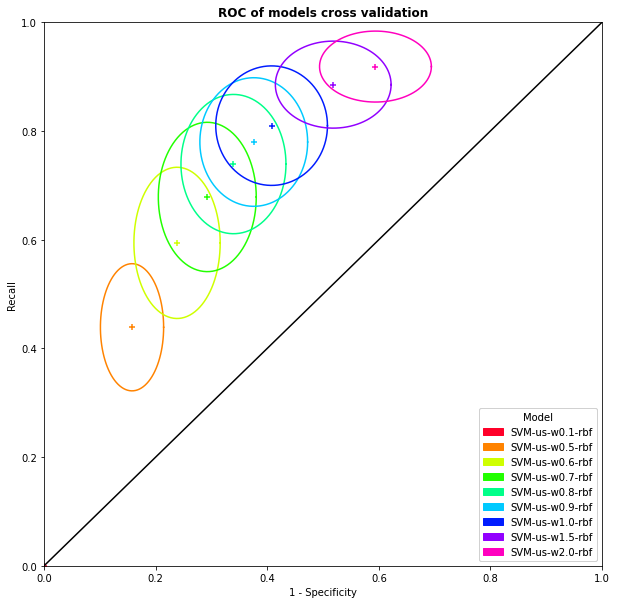

In [8]:
# NO CODE

file1 = "../../../RUN_GRICAD/res/CV_SVM-us-w0.1-rbf_res.txt"
file2 = "../../../RUN_GRICAD/res/CV_SVM-us-w0.5-rbf_res.txt"
file3 = "../../../RUN_GRICAD/res/CV_SVM-us-w0.6-rbf_res.txt"
file4 = "../../../RUN_GRICAD/res/CV_SVM-us-w0.7-rbf_res.txt"
file5 = "../../../RUN_GRICAD/res/CV_SVM-us-w0.8-rbf_res.txt"
file6 = "../../../RUN_GRICAD/res/CV_SVM-us-w0.9-rbf_res.txt"
file7 = "../../../RUN_GRICAD/res/CV_SVM-us-w1.0-rbf_res.txt"
file8 = "../../../RUN_GRICAD/res/CV_SVM-us-w1.5-rbf_res.txt"
file9 = "../../../RUN_GRICAD/res/CV_SVM-us-w2.0-rbf_res.txt"
files = [file1,file2,file3,file4,file5,file6,file7,file8,file9]
utils.ROC_patch(files)
plt.show()

:::{figure-md} fig:SVM_W
<img src="../../img/vide.png" >

ROC curve with mean coordinates and standard deviation of the cross validation results in function of the weight on the RX category.
:::

&nbsp;&nbsp;&nbsp; SVM has also a probabilistic version of the classifier. Instead of predicting a label, the predictor gives a probability to be of in a category for each text observation. The [Figure 3.19](fig:SVM_prob) shows the probabilities calculated by SVM for CI06 with learning on the 4 other samples. We can see that the form of the prediction is almost the same as the [Figure 3.17](fig:SVM_CMp). By threshold on probabilities we can get labels, but we did not get better results that classical SVM has already given.

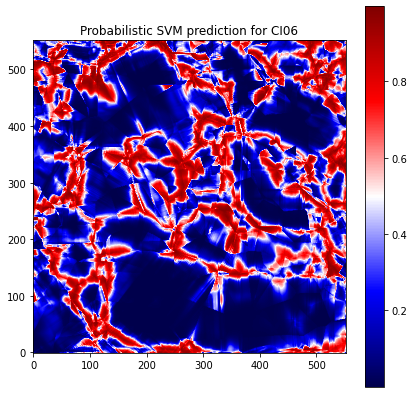

In [15]:
# NO CODE

CI06 = utils.load_data("../../data/for_learning_plus/CI06.npy")
X_val = CI06[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y_val = CI06['Y'] 
im_shape = np.shape(np.load("../../data/for_learning/CI06.npy"))
y_pred_prob = np.load("../../../RUN_GRICAD/pred/SVM-under-rbf-cw0.65-C1.0-prob-CI06.npy")
plt.figure(figsize=(7,7))
plt.imshow(y_pred_prob.T[1].reshape(im_shape[0], im_shape[1]),cmap='seismic',origin='lower')
plt.colorbar()
plt.title("Probabilistic SVM prediction for CI06")
plt.show()

:::{figure-md} fig:SVM_prob
<img src="../../img/vide.png" >

Probabilistic SVM prediction for CI06 with learning on the 4 other samples with undersampling and class weight of RX = 0.65
:::

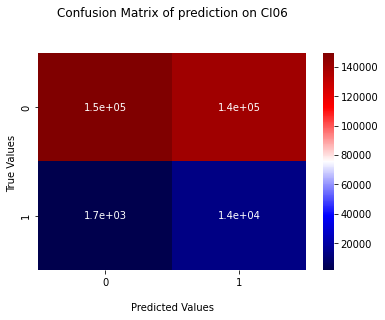

In [3]:
# HIDDEN

cms = np.loadtxt(file_cm)
mat = np.array([[cms[2][0],cms[2][1]],[cms[2][2],cms[2][3]]])

import seaborn as sns

ax = sns.heatmap(mat, annot=True, cmap='seismic')

ax.set_title('Confusion Matrix of prediction on CI06\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');

plt.show()

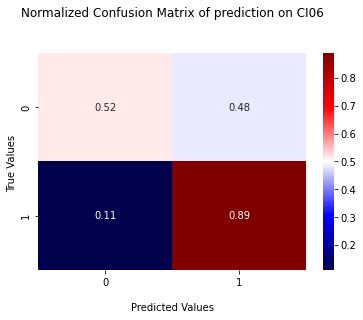

In [4]:
# HIDDEN

n_mat = np.array([[mat[0][0]/(mat[0][0]+mat[0][1]),mat[0][1]/(mat[0][0]+mat[0][1])],[mat[1][0]/(mat[1][0]+mat[1][1]),mat[1][1]/(mat[1][0]+mat[1][1])]])

cms = np.loadtxt(file_cm)

ax = sns.heatmap(n_mat, annot=True, cmap='seismic')

ax.set_title('Normalized Confusion Matrix of prediction on CI06\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');

plt.show()

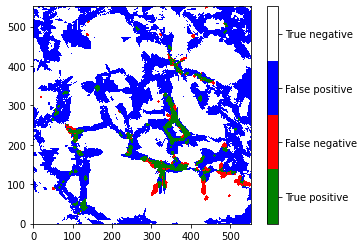

In [5]:
# HIDDEN

CI06 = utils.load_data("../../data/for_learning/CI06.npy")
y_pred = np.load("../../../RUN_GRICAD/pred/SVM-under-rbf-cw1.0-C1.0-CI06.npy")
y_val = CI06['Y'] 
im_shape = np.shape(np.load("../../data/for_learning/CI06.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape) 